# Practice Session 06: Network models


In this session we will learn to use [NetworkX](https://networkx.github.io/), a Python package, and we will write code to create random graphs and preferential attachment graphs.

**Note:** The graph generators we ask you to delive for this practice are already implemented in the NetworkX library and in other places online. *Do not copy those implementations:* they reproduce the same kinds of graph but follow a design that is different from what we describe here.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

Author: <font color="blue">Stuart Lance Richards-Weir</font>

E-mail: <font color="blue">stuartlance.richardsweir01@estudiant.upf.edu</font>

Date: <font color="blue">04/11/2025</font>

# 1. Random (ER) graph generator

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools

from collections import OrderedDict


The following function, which you can leave as-is, will be useful. It returns `True` with probability *p*, and `False` with probability *1-p*:

In [2]:
# Leave as-is

def flip_coin(p):
    if np.random.random() < p:
        return True
    else:
        return False

## 1.1. Generate ER graph

Write function `generate_random_graph(N, p)`, that:

1. Creates an empty graph
1. Adds N nodes to this graph, numbered from *0* to *N-1*
1. For each pair *(u,v)* of nodes:
   1. With probability *p*, adds an edge between *u* and *v*
1. Returns the graph

Small graphs can be easily created programmatically in Python with NetworkX.

* To create a graph, you use either `networkx.Graph` or `networkx.DiGraph`, which return an undirected an directed graph respectively.
* To add a node to a graph *g*, you use `g.add_node(u)`, where *u* is the name of the node.
* To add an edge to a graph *g*, you use `g.add_edge(u, v)`, where *u* is the name of the source of the edge, and *v* the name of the destination of the edge.

Example:

```python
g = nx.Graph()
g.add_node(0)
g.add_node(1)
g.add_edge(0, 1)
```

To generate all pairs of nodes, use:

```
for u, v in itertools.combinations(G.nodes, 2):
    ...
```

In [3]:
def generate_random_graph(N, p)-> nx.Graph:
    g = nx.Graph()
    for i in range(N):
        g.add_node(i)
        for j in range(i):
            if flip_coin(p):
                g.add_edge(i,j)
    return g
            

Write code to check whether your generator produces the correct number of edges. Generate *1000* graphs with a number of nodes *N* and connection probability *p* chosen by you, and keep track of the number of edges in the graph. Compare this visually against the number of expected edges.


In [4]:
N_try = 50
p_try = 0.5
num_graphs = 1000
g = []
observed_edges = []

for i in range(num_graphs):
    g.append(generate_random_graph(N_try,p_try))
    #print(len(g[i]))
    #print(g[i].number_of_edges())
    observed_edges.append(g[i].number_of_edges())

<font size="+1" color="red">Replace this cell with your code to generate 1000 graphs and keep their number of edges in the array ``observed_edges``.</font>

In [5]:
trials = num_graphs
max_edges = (N_try * (N_try - 1)) / 2  
expected_edges = max_edges * p_try
print("Expected number of edges:", expected_edges)

Expected number of edges: 612.5


The following compares visually the number of expected edges, which you should calculate as ``expected_edges``, with the number of actual edges.


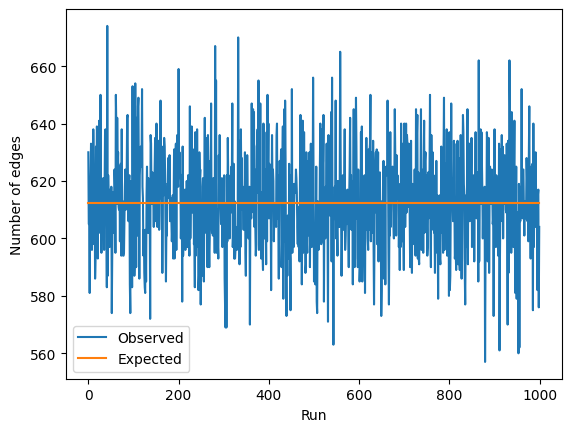

In [6]:
# Leave as-is

plt.xlabel("Run")
plt.ylabel("Number of edges")
plt.plot(range(trials), observed_edges, label="Observed")
plt.plot(range(trials), [expected_edges] * trials, label="Expected")
plt.legend()
plt.show()

Create a new generator, `generate_random_graph_avg_degree(N, kavg)` that given a target number of nodes, and a target average degree, determines the appropriate value of `p` to call `generate_random_graph(N, p)`, using the formulas seen in class.


In [7]:
def generate_random_graph_avg_degree(N, kavg) -> nx.Graph:
    max_edges = (N * (N - 1)) / 2  
    # expected_edges = max_edges * p_try
    
    expected_edges = N * kavg / 2

    p_try = float(expected_edges / max_edges)
    return generate_random_graph(N, p_try)

<font size="+1" color="red">Replace this cell with your code for ``generate_random_graph_avg_degree``.</font>

Test your new generator. First, write a function ``graph_average_degree`` that returns the average degree of a graph.

Then, generate a series of graphs with a number of nodes *N=500* of your choice and expected average degree between 0.0 and 3.0 in increments of 0.1. The observed average degree of the resulting graph should be close to the given average degree.


In [8]:
def graph_average_degree(graph : nx.Graph)-> float:
    avg = 2 * graph.number_of_edges() / graph.number_of_nodes()
    return avg

In [9]:
target_average_degrees =  []
observed_average_degrees = []
for i in range(31):
    kavg = 0.1*i
    target_average_degrees.append(kavg)
    N = 500
    graph = generate_random_graph_avg_degree(N, kavg)
    obs_avg = graph_average_degree(graph)
    observed_average_degrees.append(obs_avg)

    print(f"expected average: {kavg},   observed average {obs_avg}")

expected average: 0.0,   observed average 0.0
expected average: 0.1,   observed average 0.064
expected average: 0.2,   observed average 0.22
expected average: 0.30000000000000004,   observed average 0.264
expected average: 0.4,   observed average 0.36
expected average: 0.5,   observed average 0.488
expected average: 0.6000000000000001,   observed average 0.592
expected average: 0.7000000000000001,   observed average 0.628
expected average: 0.8,   observed average 0.82
expected average: 0.9,   observed average 0.916
expected average: 1.0,   observed average 1.132
expected average: 1.1,   observed average 1.128
expected average: 1.2000000000000002,   observed average 1.18
expected average: 1.3,   observed average 1.372
expected average: 1.4000000000000001,   observed average 1.308
expected average: 1.5,   observed average 1.48
expected average: 1.6,   observed average 1.524
expected average: 1.7000000000000002,   observed average 1.596
expected average: 1.8,   observed average 1.832
expe

The following compares visually the given average degree with the observed average degree.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


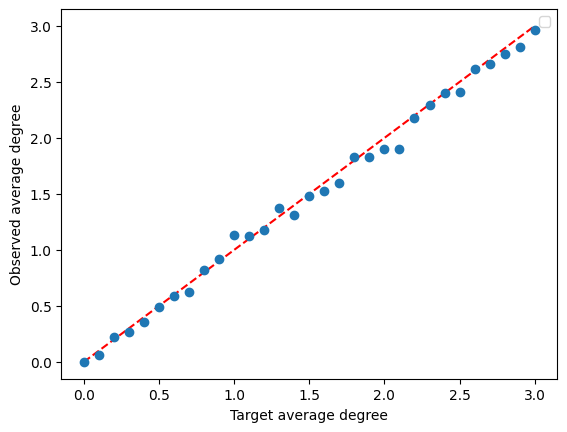

In [10]:
# Leave as-is

#!! Be careful make sure to run the previous cell just before running this one as we will be using some of the variables later and it can cause issues

plt.xlabel("Target average degree")
plt.ylabel("Observed average degree")
plt.scatter(target_average_degrees, observed_average_degrees)
plt.plot([0,max(target_average_degrees)], [0,max(target_average_degrees)], 'r--', zorder= 0)
plt.legend()
plt.show()

## 1.2. Measure connectivity


Create a function `is_connected(g)` that given a graph, answers True if the graph is connected, False otherwise. Do not use the built-in `is_connected` function of NetworkX, but feel free to use the function `nx.has_path(g, source, target)`.

Use the `itertools.combinations(G.nodes, 2)` function described above.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [11]:
def is_connected(g:nx.Graph)->bool: # Here we specify function signature: name, params,output type
    for u, v in itertools.combinations(g.nodes, 2): # Loop over every pair of nodes (handshake lemma)
        if nx.has_path(g, u, v) == False: # Iff path doesn't exist between any two nodes, the whole graph must be disconnected somewhere --> return false
            return False
    return True # if no disconnect found btw any two nodes, it must be connected

# Optimise with already_visited sets?

<font size="+1" color="red">Replace this cell with your code for *is_connected(g)*, include comments to explain what you are doing at each step.</font>

The following code, which you should leave as-is, returns the size of the largest connected component on a graph.


In [12]:
# Leave as-is

def size_largest_cc(G):

    # Obtain the list of connected components of the graph sorted from largest to smallest
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)

    # Selects the first connected component in that list
    G0 = G.subgraph(Gcc[0])

    # Returns its number of nodes
    return G0.number_of_nodes()

Create a series of ER graphs having *N=1000* nodes and target average degree  between *0.2* and *2.0* (e.g. *0.2, ..., 2.0*) with step *0.05* . Record: (1) their observed average degrees and (2) the size of their largest connected component as a fraction of the total number of nodes.

You can use the following skeleton:

```python
N = 1000
target_average_degrees = np.arange(0.2, 2.0, 0.05)

largest_cc_sizes = []
average_degrees = []

for target_average_degree in target_average_degrees:
    
    # Generate graph
    g = generate_random_graph_avg_degree(N, target_average_degree)
    assert g.number_of_nodes() == N, "Wrong number of nodes"
    
    # Obtain observed average degree
    average_degree = # YOUR CODE HERE
    average_degrees.append(average_degree)
    
    # Obtain size of largest connected component as a fraction of the total number of nodes
    largest_cc_size = # YOUR CODE HERE
    largest_cc_sizes.append(largest_cc_size)
```

Then, create a scatter plot of *average_degrees* (x axis) and *largest_cc_sizes* (y axis). Remember to label the axes of your plot appropriately.


In [13]:
N = 1000
target_average_degree = 0.2
average_degrees = []
largest_cc_sizes = []

while target_average_degree <= 2.0:
    
    graph = generate_random_graph_avg_degree(N, target_average_degree)
    assert graph.number_of_nodes() == N, "Wrong number of nodes"

    average_degree = graph_average_degree(graph)
    average_degrees.append(average_degree)

    largest_cc_size = size_largest_cc(graph)
    largest_cc_sizes.append(largest_cc_size)

    target_average_degree += 0.05

<font size="+1" color="red">Replace this cell with your code to create a plot in which in the X axis we have observed average degree and in the Y axis the size of the largest connected component, as a fraction of the number of nodes.</font>

The following code shows this visually.


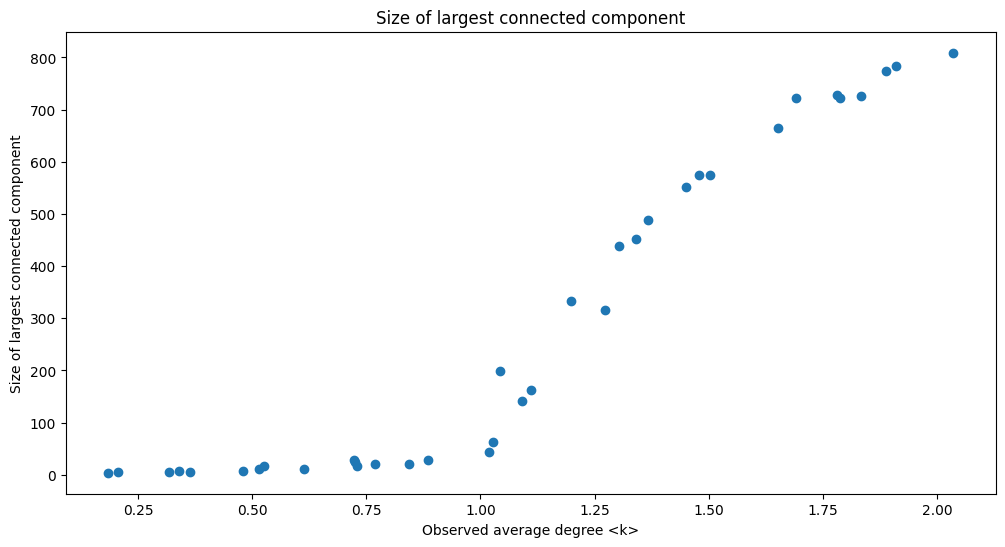

In [20]:
# LEAVE AS-IS

plt.figure(figsize=(12,6))
plt.scatter(average_degrees, largest_cc_sizes)
plt.title("Size of largest connected component")
plt.xlabel("Observed average degree <k>")
plt.ylabel("Size of largest connected component")
plt.show()

<font size="+1" color="red">Answer the following questions. (1) At which average degree does the theory say that the size of the largest connected component should increase? (2) At which average degree does it increase in this particular case?

Theory says that at $<k>$ < 1 only small clusters should be found, $<k>$ = 1 acts as a percolation barrier and $<k>$ > 1 the size of the largest connected component should increase. 

The graph above shows this behaviour very clearly, with $<k>$ = 1 being an inflection point for an increase in lcc size


## 1.3. Degree distributions and Cumulative Degree Distributions

Create another function `print_er_statistics(g,p)` that given an ER graph and a probability *p* prints:

* its observed average degree *&lt;k&gt;*
* its expected average degree given *N* and *p*, using the formula seen in class

You can get a list of *(node, degree)* pairs by invoking `g.degree()`, or ask for the degree of node *u* using `g.degree(u)`.


<font size="+1" color="red">Replace this cell with your code for ``print_er_statistics``, and execute it over each of the three ER generated graphs with N=500 and p=[0.01, 0.03, 0.1]. </font>

You can use the following function (as-is, or modified) to plot the degree distribution in a graph.

In [15]:
# Leave as-is or modify if you want
def plot_degree_distributions(g_list, p_values):
    plt.figure(figsize=(12, 6))

    for g, p in zip(g_list, p_values):
        degree_dict = dict(g.degree())
        degree_sequence = list(degree_dict.values())

        prob, bin_edges = np.histogram(
            degree_sequence,
            bins=range(1, np.max(degree_sequence) + 2),
            density=True
        )

        plt.plot(bin_edges[:-1], prob, 'o-', label=f'p={p}')

    plt.title("Probability Density Function (Degree Distribution)")
    plt.xlabel("Degree")
    plt.ylabel("Probability")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


def plot_cumulative_degree_distributions(g_list, p_values):
    plt.figure(figsize=(12, 6))

    for g, p in zip(g_list, p_values):
        degree_dict = dict(g.degree())
        degree_sequence = list(degree_dict.values())

        degree_counts, bin_edges = np.histogram(
            degree_sequence,
            bins=range(1, np.max(degree_sequence) + 2),
            density=True
        )

        cumulative_distribution = np.cumsum(degree_counts[::-1])[::-1]

        plt.plot(bin_edges[:-1], cumulative_distribution, 'o-', label=f'p={p}')

    plt.title("Cumulative Degree Distribution (P(k' ≥ k))")
    plt.xlabel("Degree (k)")
    plt.ylabel("Cumulative Probability")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


In [22]:
def print_er_statistics(g, p):
    """
    Print observed and expected average degree for an ER graph g with probability p.
    """
    N = g.number_of_nodes()
    observed_avg = graph_average_degree(g)  # uses function defined earlier in the notebook
    expected_avg = p * (N - 1)  # expected degree in G(N,p)
    print(f"ER graph: N={N}, p={p}")
    print(f"  Observed average degree: {observed_avg:.4f}")
    print(f"  Expected average degree: {expected_avg:.4f}")
    print(f"  Number of edges: {g.number_of_edges()}")
    print()

ER graph: N=500, p=0.01
  Observed average degree: 5.1240
  Expected average degree: 4.9900
  Number of edges: 1281

ER graph: N=500, p=0.03
  Observed average degree: 15.0120
  Expected average degree: 14.9700
  Number of edges: 3753

ER graph: N=500, p=0.1
  Observed average degree: 50.0520
  Expected average degree: 49.9000
  Number of edges: 12513



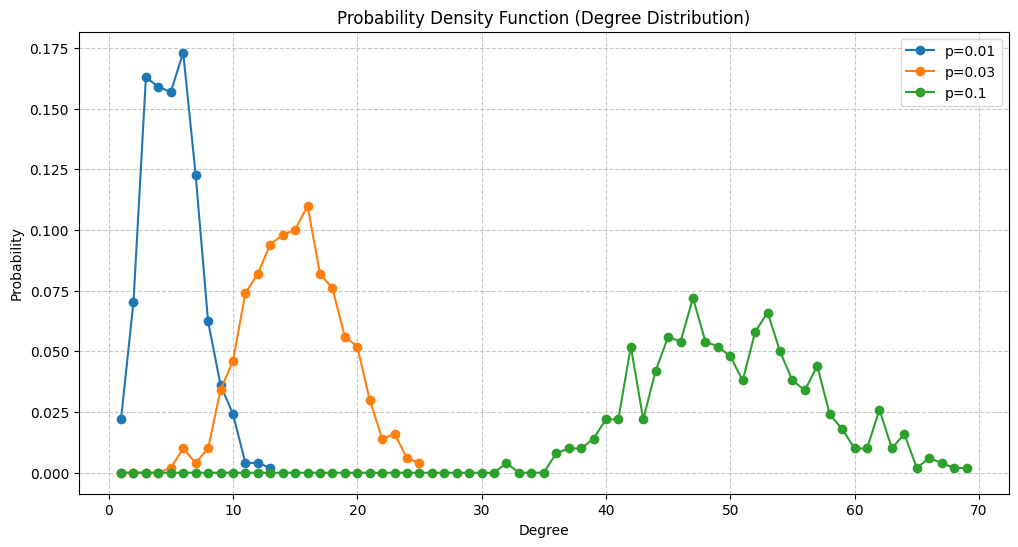

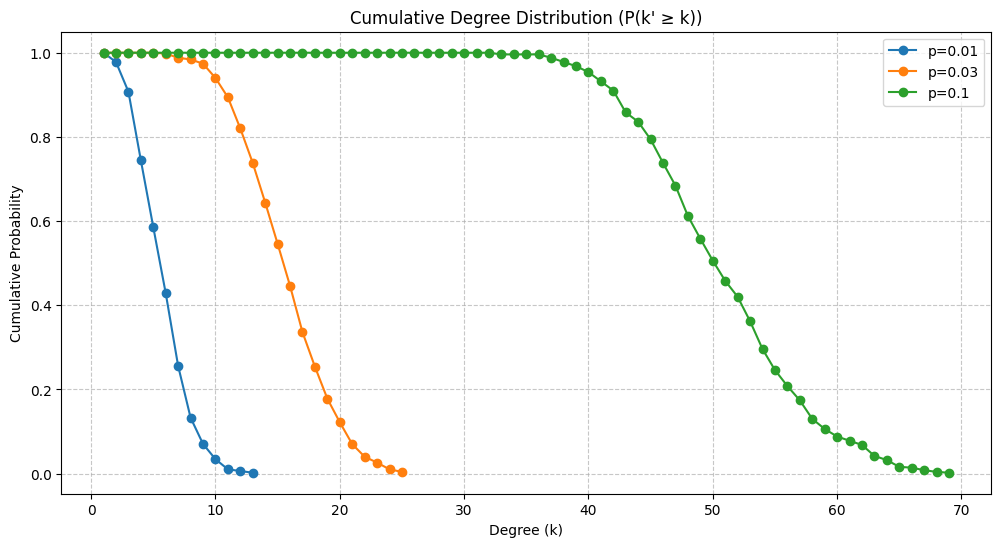

In [23]:

# Generate three ER graphs with N=500 and p in [0.01, 0.03, 0.1], then print statistics
N = 500
p_values = [0.01, 0.03, 0.1]
g_list = [generate_random_graph(N, p) for p in p_values]

for g, p in zip(g_list, p_values):
    print_er_statistics(g, p)

# Plot degree distributions and cumulative degree distributions if plotting helpers are available
try:
    plot_degree_distributions(g_list, p_values)
    plot_cumulative_degree_distributions(g_list, p_values)
except NameError:
    # plotting helpers not available in this execution order
    pass

<font size="+1" color="red">Replace this cell with four graphs with fixed *N* between 1500 and 3000, and different probabilities *p*. Start with a small probability *p* that yields a sparse graph, and increase it gradually. Not all graphs need to be connected. For each graph of its degree distribution using plot_degree_distribution, its cumulative degree distribution using plot_cumulative_degree_distribution, its average degree, and its expected average degree.</font>

ER graph: N=2000, p=0.0005
  Observed average degree: 0.9700
  Expected average degree: 0.9995
  Number of edges: 970

ER graph: N=2000, p=0.001
  Observed average degree: 2.0220
  Expected average degree: 1.9990
  Number of edges: 2022

ER graph: N=2000, p=0.005
  Observed average degree: 9.9970
  Expected average degree: 9.9950
  Number of edges: 9997

ER graph: N=2000, p=0.01
  Observed average degree: 20.0020
  Expected average degree: 19.9900
  Number of edges: 20002



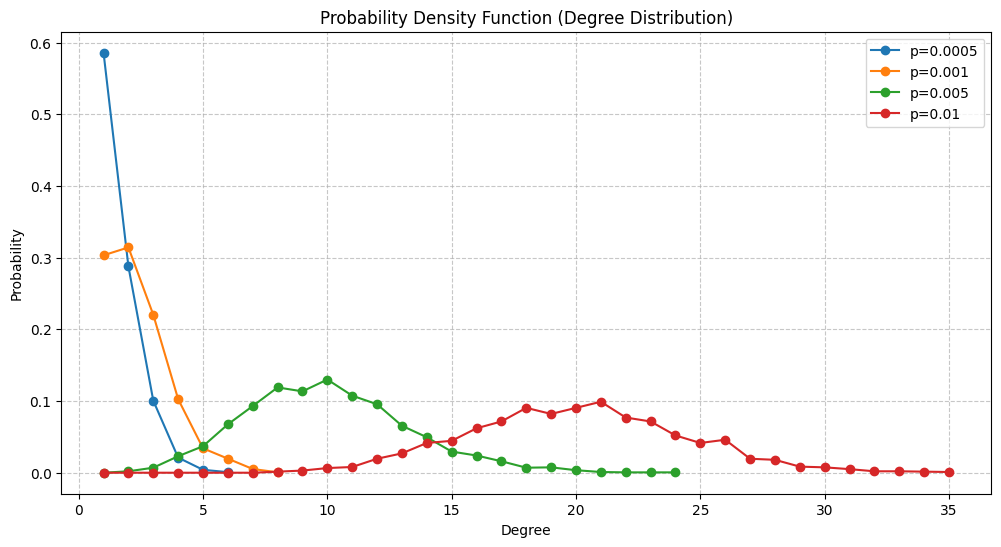

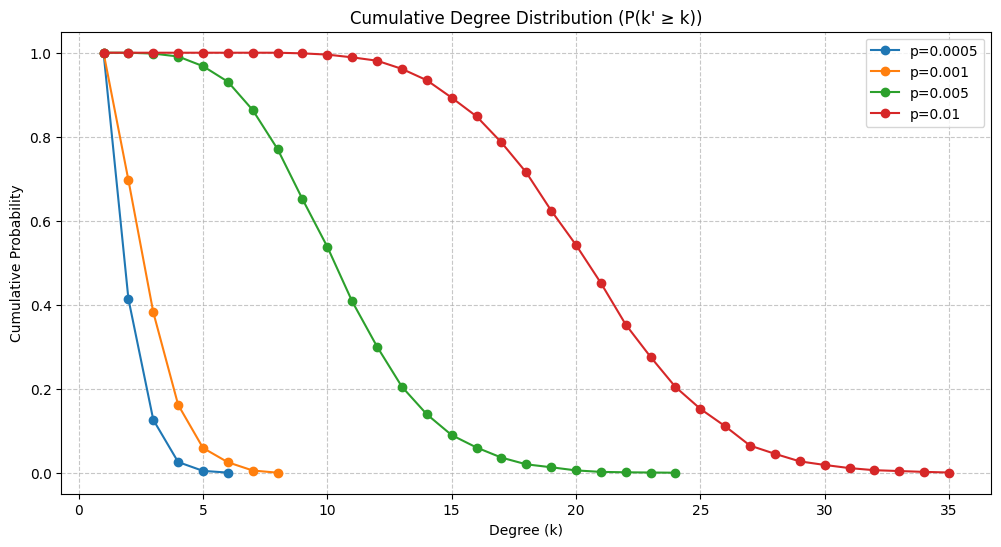

In [ ]:
# Generate four ER graphs with a fixed N (between 1500 and 3000 => 2000) and increasing p values.
# For each graph: print observed and expected average degree, plot degree distribution and cumulative.

N_large = 2000
p_values_large = [0.0005, 0.001, 0.005, 0.01]  # start sparse and increase

# Gen graphs
g_list_large = [generate_random_graph(N_large, p) for p in p_values_large]

# Print stats
for g, p in zip(g_list_large, p_values_large):
    print_er_statistics(g, p)

# Plot probability density (degree dist) and cumulative degree dist
plot_degree_distributions(g_list_large, p_values_large)
plot_cumulative_degree_distributions(g_list_large, p_values_large)

# 2. Preferential attachment (BA) generator

Write code for creating a BA graph.

The following function, `select_with_probability(x, m, p)` selects *m* elements from set *x* according to probabilities in *p*, without replacement. It uses [numpy.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) to do this.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [25]:
# LEAVE AS-IS

def select_with_probability(x, m, p):
    return np.random.choice(x, size=m, replace=False, p=p)

The next cell, which you should leave as-is, tests this function.

In [28]:
# LEAVE AS-IS

trials = 1500
vector = ['a', 'b', 'c']
probabilities = [0.75, 0.13, 0.12]

all_selected = []
for i in range(trials):
    selected = select_with_probability(vector, 1, probabilities)[0]
    all_selected.append(selected)

for i, p in zip(vector, probabilities):
    print("Element {:s} was selected {:d} times, expected {:.0f}".format(i, all_selected.count(i), trials*p) )

Element a was selected 1125 times, expected 1125
Element b was selected 186 times, expected 195
Element c was selected 189 times, expected 180


Write code for creating a BA graph.

Start by creating an auxiliary function, `select_targets(g, m)` that selects *m* target nodes in a graph *g*, with probabilities proportional to the degrees of the nodes.

```python
def select_targets(g, m):

    # Check if feasible
    N = g.number_of_nodes()  
    if N < m:
        raise ValueError('Graph has less than m nodes')

    # Compute sum of degree
    sum_degree = 0

    # YOUR CODE HERE: COMPUTE SUM OF DEGREE OF NODES
    if sum_degree == 0:
        raise ValueError('Graph as no edges')

    # Compute probabilities
    probabilities = []
    for (node, degree) in g.degree():
        # YOUR CODE HERE: COMPUTE PROBABILITY OF SELECTING NODE u
        # THEN APPEND IT TO probabilities USING probabilities.append(...)

    # Sample
    selected = select_with_probability(g.nodes(), m, probabilities)

    return selected
´´´

In [18]:
# Leave as is
def estimate_alpha_mle(degrees, k_min=1):
    degrees = np.array(degrees)
    degrees = degrees[degrees >= k_min]
    n = len(degrees)
    alpha = 1 + n / np.sum(np.log(degrees / (k_min - 0.5)))
    return alpha

<font size="+1" color="red">Replace this cell with your implementation of select_targets.</font>

In [ ]:
def select_targets(g, m):
    """
    Select m target nodes from graph g with probability proportional to node degrees.
    Raises ValueError if graph has fewer than m nodes or if sum of degrees is zero.
    """
    # Ensure feasibility
    N = g.number_of_nodes()
    if N < m:
        raise ValueError("Graph has less than m nodes")

    # Get ordered list of nodes so probabilities align with selection
    nodes = list(g.nodes())

    # Compute degrees for each node and the total degree
    degrees = np.array([g.degree(n) for n in nodes], dtype=float)
    sum_degree = degrees.sum()

    if sum_degree == 0:
        raise ValueError("Graph has no edges (sum of degrees is zero)")

    # Probabilities proportional to degree
    probabilities = degrees / sum_degree

    # Sample m distinct nodes without replacement using the helper
    selected = select_with_probability(nodes, m, probabilities)

    return list(selected)


def generate_preferential_attachment_graph(N, m0, m):
    """
    Gen a BA style preferential attachment graph following the assignment spec.

    Steps:
    - Check m <= m0
    - Create empty graph
    - Add initial m0 nodes (0 .. m0-1)
    - Create a cycle among the initial m0 nodes
    - For each new node u in range(m0, N):
        * select m targets from existing graph proportional to degree
        * add node u
        * connect u to each selected target
    - Return graph
    """
    if m > m0:
        raise ValueError("m must be <= m0")

    if N < m0:
        raise ValueError("N must be >= m0")

    G = nx.Graph()

    # Add initial m0 nodes
    for i in range(m0):
        G.add_node(i)

    # Create cycle among initial nodes: 0-1, 1-2, ..., m0-1 - 0
    for i in range(m0):
        G.add_edge(i, (i + 1) % m0)

    # Grow the network
    for u in range(m0, N):
        # Select targets from current graph (before adding u)
        targets = select_targets(G, m)

        # Add the new node
        G.add_node(u)

        # Connect new node to each selected target
        for t in targets:
            G.add_edge(u, int(t))  # ensure t is hashable/int

    return G


def plot_degree_distribution_loglog(g, k_min=1):
    """
    Plot degree distribution on log-log scale and overlay MLE power-law fit.
    Uses estimate_alpha_mle defined elsewhere in the notebook.
    """
    degree_dict = dict(g.degree())
    degree_sequence = np.array(list(degree_dict.values()))
    degree_sequence = degree_sequence[degree_sequence >= k_min]

    if len(degree_sequence) == 0:
        print("No degrees >= k_min; nothing to plot")
        return

    # Empirical histogram (probability mass function)
    prob, bin_edges = np.histogram(
        degree_sequence,
        bins=range(k_min, np.max(degree_sequence) + 2),
        density=True
    )

    x = bin_edges[:-1].astype(float)
    y = prob

    # Filter zeros for log plotting
    mask = y > 0
    x = x[mask]
    y = y[mask]

    if len(x) == 0:
        print("No positive-probability bins to plot")
        return

    # Estimate alpha using MLE helper (requires raw degrees and k_min)
    alpha = estimate_alpha_mle(degree_sequence, k_min=k_min)

    # Power-law fit normalized to empirical first point
    # y_fit = C * x^(-alpha). Choose C so y_fit[0] == y[0]
    y_fit = y[0] * (x / x[0]) ** (-alpha)

    # Plot empirical and fit on log-log
    plt.figure(figsize=(12, 6))
    plt.loglog(x, y, 'o', alpha=0.7, label='Empirical data')
    plt.loglog(x, y_fit, '--', color='red', label=f'MLE Power-law fit: α={alpha:.2f}')
    plt.xlabel("Degree (k)")
    plt.ylabel("P(k)")
    plt.title("Degree Distribution (Log-Log Scale)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

Now, create a function `generate_preferential_attachment_graph(N, m0, m)` that:

1. Checks that *m <= m0* or raises a ValueError
1. Creates an empty graph
1. Adds nodes numbered from *0* to *m<sub>0</sub> - 1* to the graph
1. Creates a cycle by linking node *0* to node *1*, node *1* to node *2*, ..., node *m<sub>0</sub>-1* to node *0*
1. For every node *u* numbered from *m<sub>0</sub>* to *N - 1*
   1. Select *m* targets for this node using `select_targets`
   1. Add node *u* (remember to select targets **before** adding the node *u*)
   1. Link each node *u* to each of the *m* targets
1. Returns the graph

To test your code, you can do small experiments with, e.g., *N=100, m<sub>0</sub>=5, m=5* or *N=500, m<sub>0</sub>=2, m=1*, but do not include these small experimens with your deliverable.


Generating BA graph: N=5000, m0=5, m=3


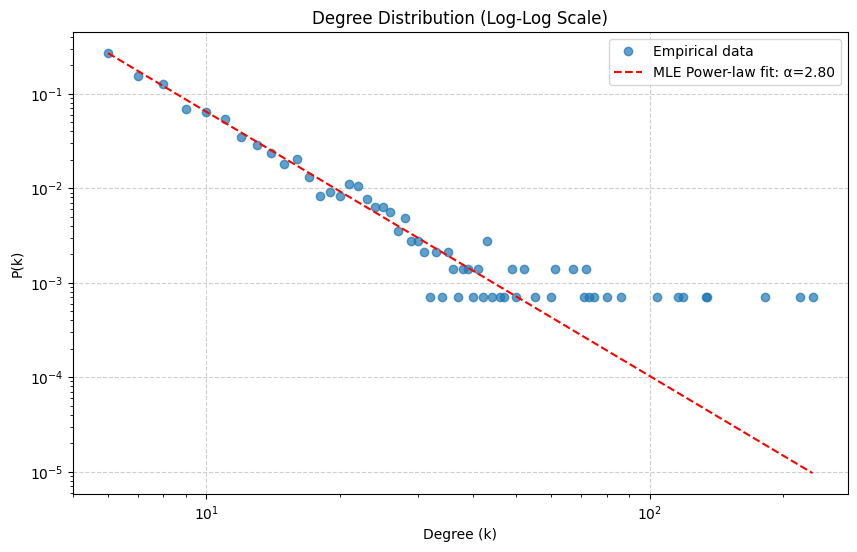

Estimated alpha (k_min=6): 2.7974

Generating BA graph: N=5000, m0=7, m=2


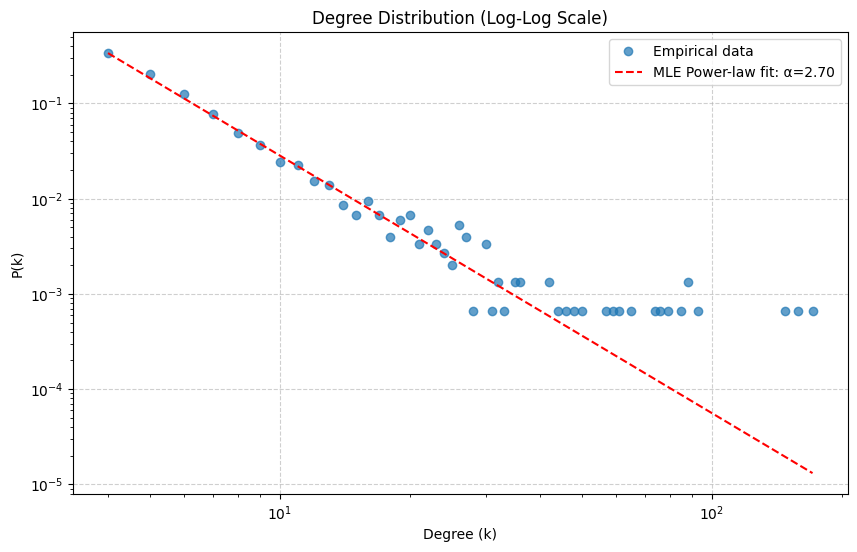

Estimated alpha (k_min=4): 2.7044



In [30]:
# Complete and use a log-log degree distribution plotter with MLE power-law fit,
# then generate two BA graphs with N=5000 and plot them (k_min = 2*m).

def plot_degree_distribution_loglog(g, k_min=1):
    """
    Plot degree distribution on log-log scale and overlay MLE power-law fit.
    Returns estimated alpha.
    """
    degree_dict = dict(g.degree())
    degree_sequence = np.array(list(degree_dict.values()))
    degree_sequence = degree_sequence[degree_sequence >= k_min]

    if len(degree_sequence) == 0:
        print("No degrees >= k_min; nothing to plot")
        return None

    # Empirical histogram (probability mass function)
    prob, bin_edges = np.histogram(
        degree_sequence,
        bins=range(k_min, np.max(degree_sequence) + 2),
        density=True
    )

    x = bin_edges[:-1].astype(float)
    y = prob

    # Filter zeros for log plotting
    mask = y > 0
    x = x[mask]
    y = y[mask]

    if len(x) == 0:
        print("No positive-probability bins to plot")
        return None

    # Estimate alpha using MLE helper defined earlier in the notebook
    alpha = estimate_alpha_mle(degree_sequence, k_min=k_min)

    # Power-law fit normalized to empirical first point
    y_fit = y[0] * (x / x[0]) ** (-alpha)

    # Plot empirical and fit on log-log
    plt.figure(figsize=(10, 6))
    plt.loglog(x, y, 'o', alpha=0.7, label='Empirical data')
    plt.loglog(x, y_fit, '--', color='red', label=f'MLE Power-law fit: α={alpha:.2f}')
    plt.xlabel("Degree (k)")
    plt.ylabel("P(k)")
    plt.title("Degree Distribution (Log-Log Scale)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    return alpha

# Generate two BA graphs with N=5000 and chosen (m0, m) pairs in range 1-10.
configs = [(5000, 5, 3), (5000, 7, 2)]  # (N, m0, m)

for N_ba, m0, m in configs:
    print(f"Generating BA graph: N={N_ba}, m0={m0}, m={m}")
    G_ba = generate_preferential_attachment_graph(N_ba, m0, m)
    kmin = max(1, 2 * m)  # tip recommended: k_min = 2*m
    alpha_est = plot_degree_distribution_loglog(G_ba, k_min=kmin)
    if alpha_est is not None:
        print(f"Estimated alpha (k_min={kmin}): {alpha_est:.4f}\n")

When alpha = 3
Preferential attachment: In this model, new nodes are more likely to connect to nodes that already have a high number of connections, creating "hubs". This mechanism leads to the scale-free property and the specific exponent value of 3, which is what is estimated above

# 3. ER and BA graph Comparison

In [31]:
#Leave as is
def plot_degree_distribution(g):
    degree_dict = dict(g.degree())
    degree_ordered = OrderedDict(sorted(degree_dict.items(), key=lambda x: x[1], reverse=True))
    degree_sequence = list(degree_ordered.values())
    prob, bin_edges = np.histogram(degree_sequence, bins=range(1,np.max(degree_sequence)+2), density=True)
    plt.figure(figsize=(12,6))
    plt.loglog(bin_edges[:-1], prob, 'o-')
    plt.title("Probability density function")
    plt.xlabel("degree")
    plt.ylabel("probability")
    plt.autoscale(enable=True, axis='both')
    plt.show()

To draw a graph, you can use:

```python
nx.draw_networkx(g)
```

You can have more control over the visualization of the graph, such as setting the figure size, removing the axis, using a particular layout algorithm, or changing the node size or color:

```python
plt.figure(figsize=(12,6))
plt.axis('off')
pos=nx.spring_layout(g)
nx.draw_networkx(g, pos, with_labels=True, node_size=500, node_color='lightgreen')
```

Tip: In the graph drawings of ER and BA graphs on this report you can use options `with_labels=False, node_size=10` (you can play with different values for `node_size`)

<font size="+1" color="red"> Generate an ER and a BA graph of size 300. Draw them and plot their degree distribution. Use p=0.02, m0=5 and m=1.</font>

ER graph statistics:
ER graph: N=300, p=0.02
  Observed average degree: 5.7133
  Expected average degree: 5.9800
  Number of edges: 857

BA graph statistics:
BA graph: N=300, m0=5, m=1
  Observed average degree: 2.0000
  Expected average degree (approx): 2.0000
  Number of edges: 300



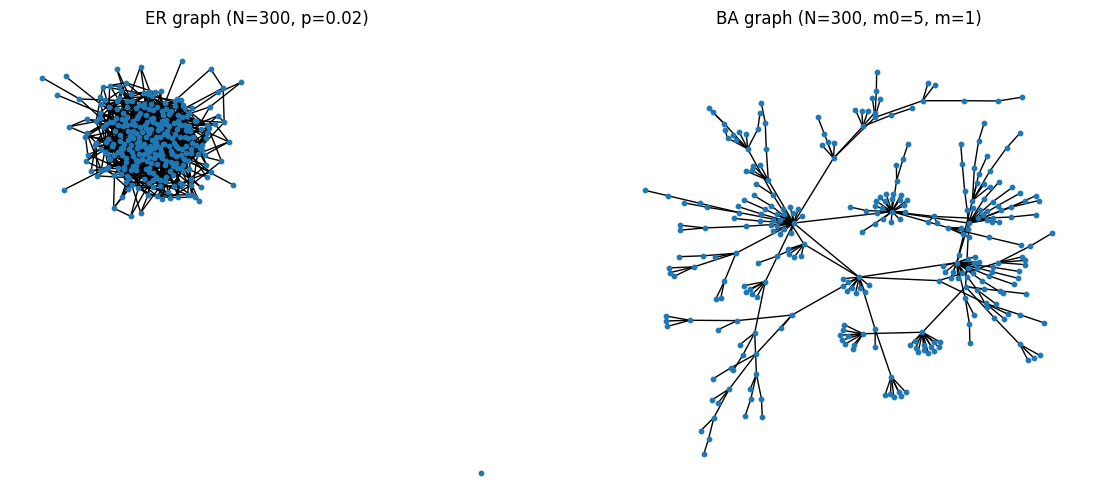

ER degree distribution:


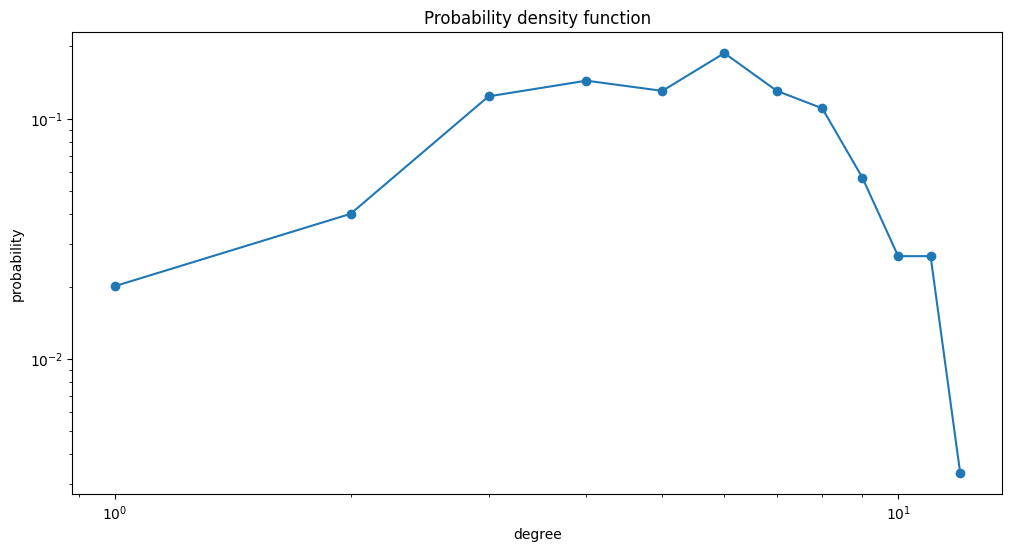

BA degree distribution:


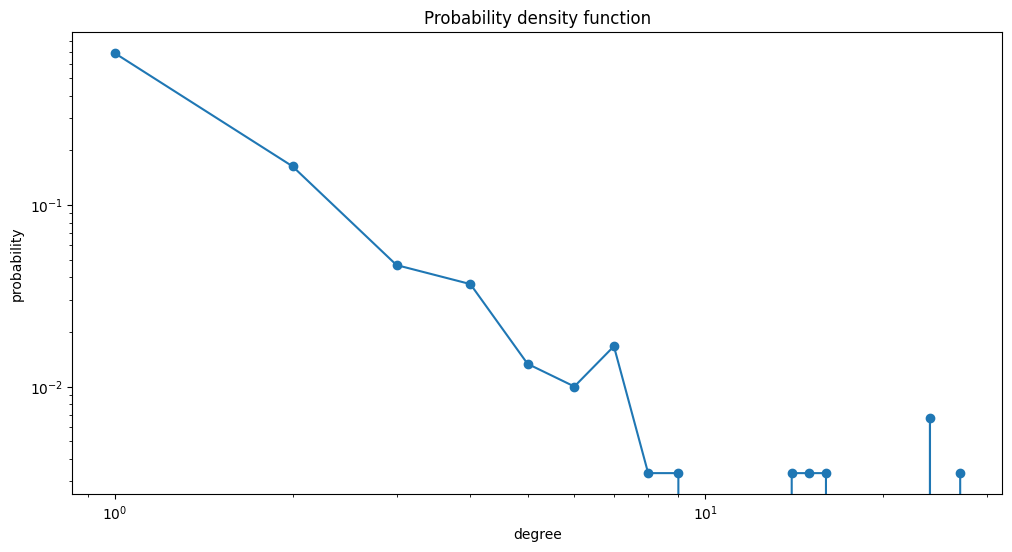

In [33]:
# Generate ER and BA graphs of size 300 and visualize them and their degree distributions.

N_small = 300
p_er = 0.02
m0_small = 5
m_small = 1

# Generate graphs (uses functions already defined in the notebook)
er_g = generate_random_graph(N_small, p_er)
ba_g = generate_preferential_attachment_graph(N_small, m0_small, m_small)

# Print statistics
print("ER graph statistics:")
print_er_statistics(er_g, p_er)

print("BA graph statistics:")
obs_avg_ba = graph_average_degree(ba_g)
expected_avg_ba = 2 * m_small  # in BA each new node adds m_small edges -> average degree ~ 2m
print(f"BA graph: N={ba_g.number_of_nodes()}, m0={m0_small}, m={m_small}")
print(f"  Observed average degree: {obs_avg_ba:.4f}")
print(f"  Expected average degree (approx): {expected_avg_ba:.4f}")
print(f"  Number of edges: {ba_g.number_of_edges()}\n")

# Draw graphs side-by-side
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.title(f"ER graph (N={N_small}, p={p_er})")
plt.axis('off')
pos_er = nx.spring_layout(er_g, seed=42)
nx.draw_networkx(er_g, pos=pos_er, with_labels=False, node_size=10)

plt.subplot(1, 2, 2)
plt.title(f"BA graph (N={N_small}, m0={m0_small}, m={m_small})")
plt.axis('off')
pos_ba = nx.spring_layout(ba_g, seed=42)
nx.draw_networkx(ba_g, pos=pos_ba, with_labels=False, node_size=10)

plt.show()

# Plot degree distributions (uses helper plot_degree_distribution defined in the notebook)
print("ER degree distribution:")
plot_degree_distribution(er_g)

print("BA degree distribution:")
plot_degree_distribution(ba_g)

<font size="+1" color="red">Give a very brief comment on the differences between the two graphs regarding:
1. Structure of the network.
2. The probability density function.</font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>